### ✅ Distribución Binomial

**Problema 1:**  
Una fábrica produce tornillos, y el 5% de ellos son defectuosos.  
Si seleccionas 20 tornillos al azar, ¿cuál es la probabilidad de que **exactamente 2** estén defectuosos?  
Graficar PMF de simulación con 10000 tornillos y PMF teórica  
Graficar CDF  
Graficar cuartiles y outliers de la simulación  
**solución:** 0.0105


Probabilidad de que exactamente 2 tornillos estén defectuosos: 0.0105
Varianza: 1.9000
Desviación estándar: 1.3784
Media: 2.0000
Moda: 2.0000
Coeficiente de asimetría: 0.6529
Curtosis: 0.3763
Mediana: 2.5000


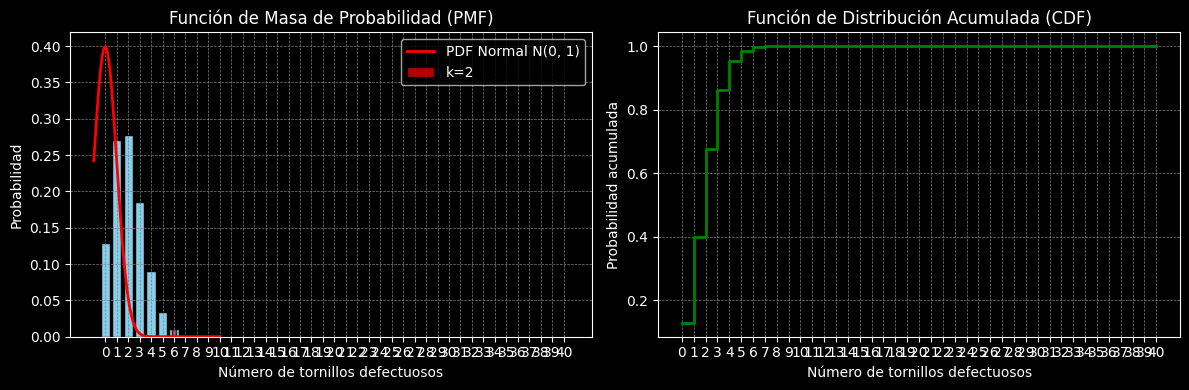

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

plt.style.use('dark_background')

# Parámetros del problema
n = 20  # número de tornillos seleccionados
p = 0.05  # probabilidad de que un tornillo sea defectuoso
k = 2  # número de tornillos defectuosos que estamos buscando

# Calcular la probabilidad de exactamente 2 tornillos defectuosos
prob_exactly_2 = binom.pmf(k, n, p)
print(f"Probabilidad de que exactamente 2 tornillos estén defectuosos: {prob_exactly_2:.4f}")

# Generar el rango de posibles valores de k (número de defectuosos)
k_values = np.arange(0, n+1)

# Calcular la PMF (función de masa de probabilidad)
pmf_values = binom.pmf(k_values, n, p)

# Calcular la CDF (función de distribución acumulada)
cdf_values = binom.cdf(k_values, n, p)

#varianza y desviación estándar
varianza = n * p * (1 - p)
desviacion_estandar = np.sqrt(varianza)
print(f"Varianza: {varianza:.4f}")
print(f"Desviación estándar: {desviacion_estandar:.4f}")

# otras métricas
media = n * p
moda = np.floor((n + 1) * p)
coeficiente_asimetria = (1 - 2 * p) / np.sqrt(n * p * (1 - p))
curtosis = (1 - 6 * p * (1 - p)) / (n * p * (1 - p))
mediana = np.floor((n + 1) * p) if (n + 1) * p % 1 == 0 else np.floor((n + 1) * p) + 0.5

print(f"Media: {media:.4f}")
print(f"Moda: {moda:.4f}")
print(f"Coeficiente de asimetría: {coeficiente_asimetria:.4f}")
print(f"Curtosis: {curtosis:.4f}")
print(f"Mediana: {mediana:.4f}")

# normal
x = np.linspace(-1, 10, 1000)
pdf = norm.pdf(x, loc=0, scale=1)

# Graficar la PMF
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(k_values, pmf_values, color='skyblue', edgecolor='black')
plt.bar(k, prob_exactly_2, color='red', edgecolor='black', width=0.3, label='k=2', alpha=0.7)
plt.plot(x, pdf, 'r-', lw=2, label="PDF Normal N(0, 1)")
plt.title('Función de Masa de Probabilidad (PMF)')
plt.xticks(np.arange(0, n+1, 1))
plt.xlabel('Número de tornillos defectuosos')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.step(k_values, cdf_values, where='post', color='green', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF)')
plt.xticks(np.arange(0, n+1, 1))
plt.xlabel('Número de tornillos defectuosos')
plt.ylabel('Probabilidad acumulada')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


tornillos defectuosos (simulación): [2 2 1 3 3 1 1 1 3 2 2 2 1 3 3 0 1 1 3 1 1 0 3 3 0 3 0 1 4 5 1 3 3 2 0 0 1
 1 3 2]...
Media (simulación): 1.9944
Varianza (simulación): 1.8954
Desviación estándar (simulación): 1.3767
Moda (simulación): 2.0000
Coeficiente de asimetría (simulación): 0.6529
Curtosis (simulación): 0.3763
Mediana (simulación): 2.0000


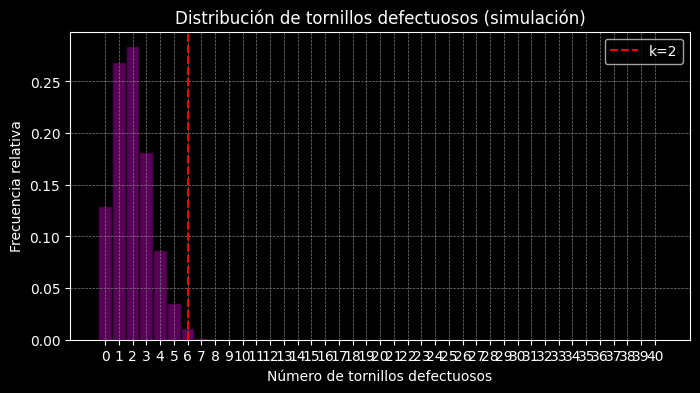

Resumen de resultados:
Probabilidad de exactamente 2 tornillos defectuosos: 0.0105
Probabilidad de 0 a 2 tornillos defectuosos: 0.9966
Probabilidad de más de 2 tornillos defectuosos: 0.0034
Simulación de 10000 experimentos: media = 1.99, varianza = 1.90


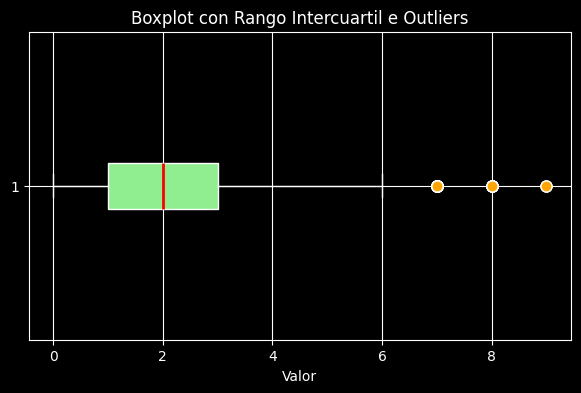

Q1: 1.0
Q3: 3.0
IQR: 2.0
Outliers detectados: [7 8 8 7 7 7 7 7 8 8 8 7 7 9 7 7 7 9 7 7 7 8 7 7 7 7 7]


In [59]:
tornillos_defectuosos = np.random.binomial(n, p, 10000)
mediana_simulacion = np.median(tornillos_defectuosos)
varianza_simulacion = np.var(tornillos_defectuosos)
desviacion_estandar_simulacion = np.std(tornillos_defectuosos)
moda_simulacion = np.floor((n + 1) * p)
media_simulacion = np.mean(tornillos_defectuosos)
coeficiente_asimetria_simulacion = (1 - 2 * p) / np.sqrt(n * p * (1 - p))
curtosis_simulacion = (1 - 6 * p * (1 - p)) / (n * p * (1 - p))
# Calcular cuartiles
q1 = np.percentile(tornillos_defectuosos, 25)
q3 = np.percentile(tornillos_defectuosos, 75)
iqr = q3 - q1

# Limites para detectar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Detectar outliers
outliers = tornillos_defectuosos[(tornillos_defectuosos < limite_inferior) | (tornillos_defectuosos > limite_superior)]



print(f"tornillos defectuosos (simulación): {tornillos_defectuosos[:40]}...")
print(f"Media (simulación): {media_simulacion:.4f}")
print(f"Varianza (simulación): {varianza_simulacion:.4f}")
print(f"Desviación estándar (simulación): {desviacion_estandar_simulacion:.4f}")
print(f"Moda (simulación): {moda_simulacion:.4f}")
print(f"Coeficiente de asimetría (simulación): {coeficiente_asimetria_simulacion:.4f}")
print(f"Curtosis (simulación): {curtosis_simulacion:.4f}")
print(f"Mediana (simulación): {mediana_simulacion:.4f}")


plt.figure(figsize=(8, 4))
plt.hist(tornillos_defectuosos, bins=np.arange(-0.5, n+1.5, 1), density=True, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribución de tornillos defectuosos (simulación)')
plt.xlabel('Número de tornillos defectuosos')
plt.ylabel('Frecuencia relativa')
plt.xticks(np.arange(0, n+1, 1))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axvline(k, color='red', linestyle='--', label='k=2')
plt.legend()
plt.show()
# Resumen de resultados
print(f"Resumen de resultados:")
print(f"Probabilidad de exactamente 2 tornillos defectuosos: {prob_exactly_2:.4f}")
print(f"Probabilidad de 0 a 2 tornillos defectuosos: {cdf_values[k]:.4f}")
print(f"Probabilidad de más de 2 tornillos defectuosos: {1 - cdf_values[k]:.4f}")
print(f"Simulación de 10000 experimentos: media = {np.mean(tornillos_defectuosos):.2f}, varianza = {np.var(tornillos_defectuosos):.2f}")

# Crear boxplot
plt.figure(figsize=(7, 4))
plt.boxplot(tornillos_defectuosos, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', color='black', markersize=8, markerfacecolor='orange'))

# Etiquetas y detalles
plt.title("Boxplot con Rango Intercuartil e Outliers")
plt.xlabel("Valor")
plt.grid(True)
plt.show()

# Mostrar cuartiles y outliers
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Outliers detectados: {outliers}")